<a href="https://colab.research.google.com/github/M-TALH007/cv2/blob/main/cv_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!unzip copy_dataset.zip


Archive:  copy_dataset.zip
replace copy_dataset/train/1000/1000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: copy_dataset/train/1000/1000.jpg  
  inflating: copy_dataset/train/1000/CamScanner 11-05-2023 10.30_10.jpg  
  inflating: copy_dataset/train/1000/IMG_20121201_010120.jpg  
  inflating: copy_dataset/train/1000/IMG_20121202_195801.jpg  
  inflating: copy_dataset/train/1000/IMG_20121202_195903.jpg  
  inflating: copy_dataset/train/1000/IMG_20121202_195947.jpg  
  inflating: copy_dataset/train/1000/IMG_20121202_200039.jpg  
  inflating: copy_dataset/train/1000/IMG_20121203_172755.jpg  
  inflating: copy_dataset/train/1000/IMG_20121203_172937.jpg  
  inflating: copy_dataset/train/1000/IMG_20121203_173051.jpg  
  inflating: copy_dataset/train/1000/IMG_20121203_173323.jpg  
  inflating: copy_dataset/train/1000/IMG_20121203_173415.jpg  
  inflating: copy_dataset/train/1000/IMG_20121203_173455.jpg  
  inflating: copy_dataset/train/1000/IMG_20121203_173537.jpg  
  inflating

In [ ]:
import pathlib
data_dir = pathlib.Path("copy_dataset/train")
data_dir

PosixPath('copy_dataset/train')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('copy_dataset/train/5000/IMG_20130111_103557.jpg'),
 PosixPath('copy_dataset/train/5000/IMG_20130111_111342.jpg'),
 PosixPath('copy_dataset/train/5000/IMG_20130111_103136.jpg'),
 PosixPath('copy_dataset/train/5000/IMG-20231107-WA0025.jpg'),
 PosixPath('copy_dataset/train/5000/IMG-20231107-WA0073.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

391


In [ ]:
five_hundred = list(data_dir.glob('500/*'))
five_hundred[:5]

[PosixPath('copy_dataset/train/500/IMG_20121205_200223.jpg'),
 PosixPath('copy_dataset/train/500/IMG_20130110_233806.jpg'),
 PosixPath('copy_dataset/train/500/IMG_20130110_232846.jpg'),
 PosixPath('copy_dataset/train/500/IMG_20130110_235448.jpg'),
 PosixPath('copy_dataset/train/500/IMG_20121205_201403.jpg')]

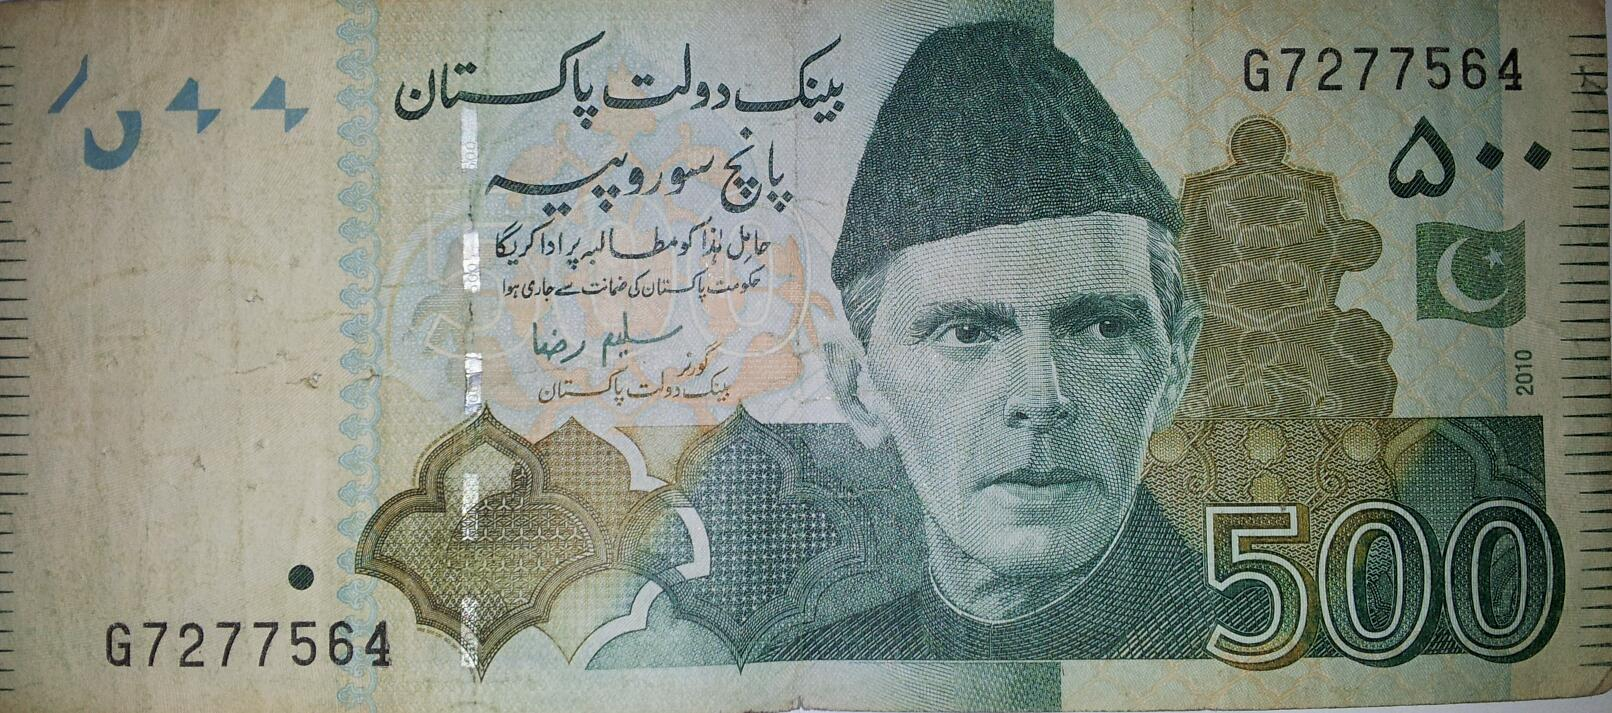

In [ ]:
PIL.Image.open(str(five_hundred[1]))

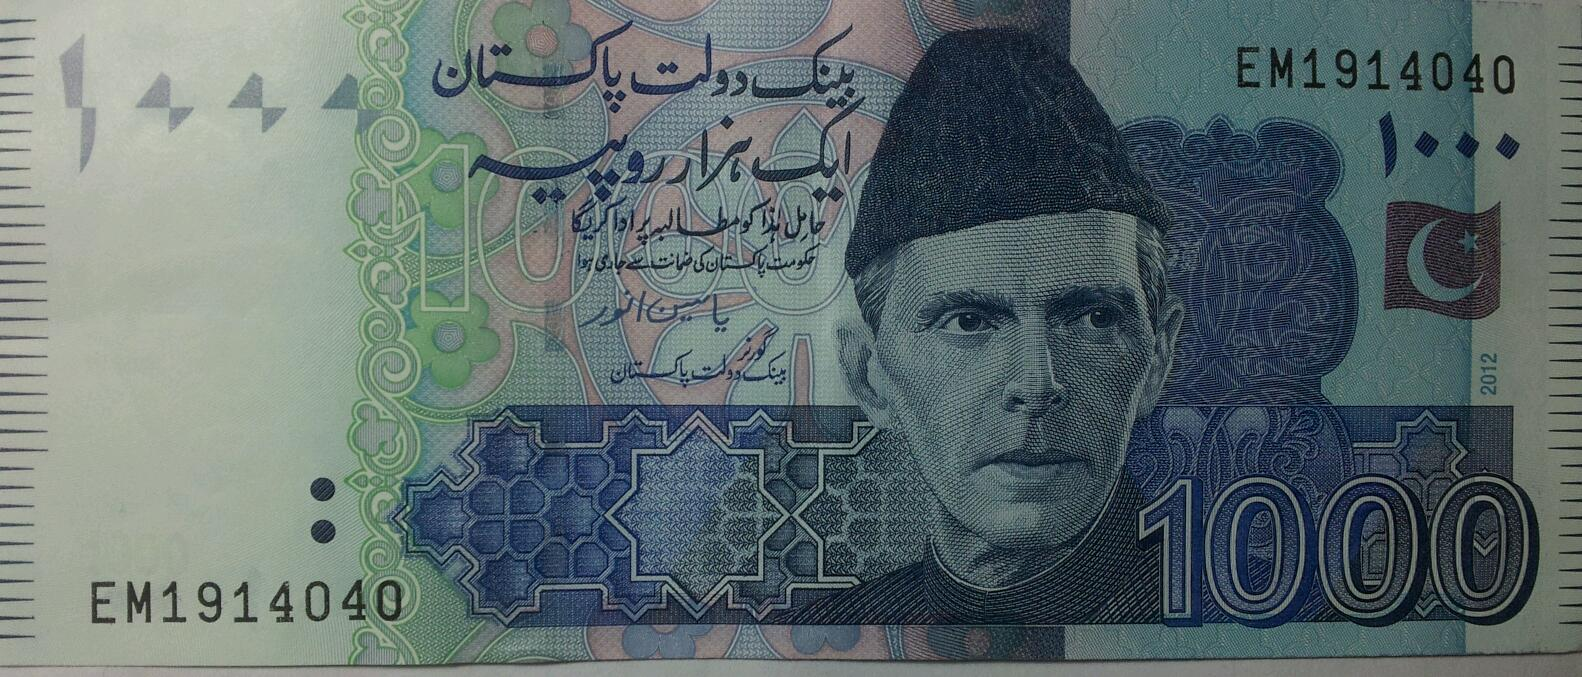

In [ ]:
thousand = list(data_dir.glob('1000/*'))
PIL.Image.open(str(thousand[0]))

In [ ]:
currency_images_dict = {
    'five_hundred': list(data_dir.glob('500/*')),
    'thousand': list(data_dir.glob('1000/*')),
    'five_thousand': list(data_dir.glob('5000/*')),
}

In [ ]:
currency_labels_dict = {
    'five_hundred': 0,
    'thousand': 1,
    'five_thousand': 2,
}

In [ ]:
currency_images_dict['thousand'][:5]

[PosixPath('copy_dataset/train/1000/IMG_20121201_010120.jpg'),
 PosixPath('copy_dataset/train/1000/IMG-20231107-WA0021.jpg'),
 PosixPath('copy_dataset/train/1000/IMG-20231107-WA0030.jpg'),
 PosixPath('copy_dataset/train/1000/IMG-20231107-WA0033.jpg'),
 PosixPath('copy_dataset/train/1000/IMG_20130109_165110.jpg')]

In [ ]:
str(currency_images_dict['thousand'][0])

'copy_dataset/train/1000/IMG_20121201_010120.jpg'

In [ ]:
img = cv2.imread(str(currency_images_dict['thousand'][0]))
img.shape

(677, 1582, 3)

In [ ]:
X, y = [], []

for currency_name, images in currency_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(currency_labels_dict[currency_name])

In [ ]:
X = np.array(X)
y = np.array(y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [ ]:
num_classes = 3

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
10/10 [==============================] - 2s 26ms/step - loss: 1.3949 - accuracy: 0.3639
Epoch 2/30
10/10 [==============================] - 0s 20ms/step - loss: 0.9162 - accuracy: 0.5340
Epoch 3/30
10/10 [==============================] - 0s 19ms/step - loss: 0.4232 - accuracy: 0.9456
Epoch 4/30
10/10 [==============================] - 0s 19ms/step - loss: 0.1133 - accuracy: 0.9660
Epoch 5/30
10/10 [==============================] - 0s 20ms/step - loss: 0.0742 - accuracy: 0.9762
Epoch 6/30
10/10 [==============================] - 0s 20ms/step - loss: 0.0561 - accuracy: 0.9796
Epoch 7/30
10/10 [==============================] - 0s 20ms/step - loss: 0.0257 - accuracy: 0.9932
Epoch 8/30
10/10 [==============================] - 0s 19ms/step - loss: 0.0592 - accuracy: 0.9728
Epoch 9/30
10/10 [==============================] - 0s 19ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 10/30
10/10 [==============================] - 0s 20ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 0s 9ms/step - loss: 7.9924e-04 - accuracy: 1.0000


[0.0007992446189746261, 1.0]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

4/4 [==============================] - 0s 9ms/step


array([[ 14.669769  ,   2.907381  , -11.321006  ],
       [ -3.413267  ,  10.017191  , -16.385473  ],
       [  9.2588    ,   2.7990208 ,  -3.1104386 ],
       [ -5.9408717 ,  -5.897858  ,  17.598259  ],
       [-11.241299  ,  -2.2375631 ,  16.62004   ],
       [ -2.073573  ,  10.558558  , -17.32515   ],
       [  1.593687  ,   4.222764  ,  -1.9392242 ],
       [ -2.090642  ,   0.37379447,  12.384571  ],
       [ 15.568662  ,   0.9137551 ,  -8.241955  ],
       [ 15.861283  ,   1.8636051 , -10.125565  ],
       [  9.182356  ,   0.58940667,   0.57730573],
       [ -1.6623546 ,  10.326445  , -16.787382  ],
       [ -3.626168  ,  10.408883  , -15.662003  ],
       [ 10.828973  ,   1.2607142 ,  -1.3029559 ],
       [ -3.3057275 ,   9.046235  , -15.2107115 ],
       [ -8.133784  ,  -3.7735424 ,  16.9332    ],
       [ -3.1954055 ,   8.829734  , -14.516669  ],
       [ 10.829464  ,   1.3446478 ,  -2.7278821 ],
       [ 15.5757475 ,   1.2083352 ,  -8.879009  ],
       [ -2.4991384 ,   9.96583

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

0

In [ ]:
y_test[0]

0

# ***Data Augmentation***


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

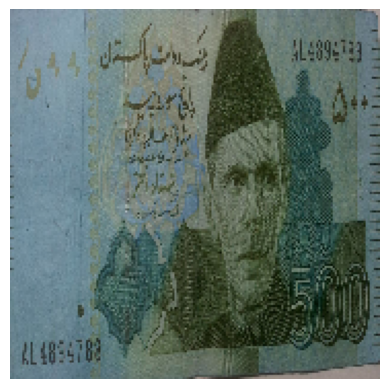

In [ ]:
plt.axis('off')
plt.imshow(X[0])

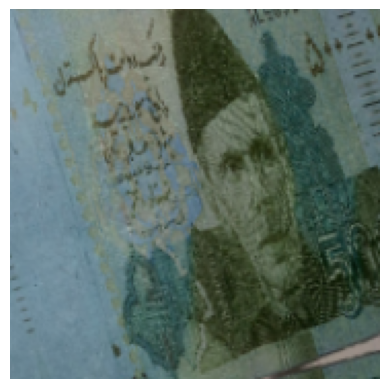

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
10/10 [==============================] - 2s 36ms/step - loss: 1.5036 - accuracy: 0.3707
Epoch 2/30
10/10 [==============================] - 0s 28ms/step - loss: 0.9051 - accuracy: 0.6531
Epoch 3/30
10/10 [==============================] - 0s 27ms/step - loss: 0.5326 - accuracy: 0.7823
Epoch 4/30
10/10 [==============================] - 0s 27ms/step - loss: 0.3100 - accuracy: 0.9082
Epoch 5/30
10/10 [==============================] - 0s 28ms/step - loss: 0.2605 - accuracy: 0.9014
Epoch 6/30
10/10 [==============================] - 0s 27ms/step - loss: 0.1346 - accuracy: 0.9626
Epoch 7/30
10/10 [==============================] - 0s 28ms/step - loss: 0.1140 - accuracy: 0.9592
Epoch 8/30
10/10 [==============================] - 0s 29ms/step - loss: 0.1631 - accuracy: 0.9490
Epoch 9/30
10/10 [==============================] - 0s 28ms/step - loss: 0.0793 - accuracy: 0.9728
Epoch 10/30
10/10 [==============================] - 0s 27ms/step - loss: 0.0595 - accuracy: 0.9830
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 0s 8ms/step - loss: 0.0968 - accuracy: 0.9592


[0.09684240818023682, 0.9591836929321289]

In [ ]:
model.save("model.h5")

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       